
#1. Derivadas.


En el metodo Smoothed-particle hydrodynamics ([SPH](!https://en.wikipedia.org/wiki/Smoothed-particle_hydrodynamics)) se emplean diferentes kernel de aproximación para calcular las propiedades  de un fluído en cada punto del espacio. Uno de ellos es el Kernel de Lucy detallado a continuación:

### Lucy's Quartic Kernel 
\begin{equation}
W(R, h)= \alpha_D \left\{
  \begin{matrix} \left(1+3q)(1- q^3\right) &  0\leq q< h \\ 
  0 & in\ the\ other\ case.
  \end{matrix}
\right.
\end{equation}

donde, 

\begin{equation}
q=\frac{|(\vec{r}-\vec{r}')|}{h}
\end{equation}

y $\alpha_D$ es la constante de normalización:

- en 2 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{5}{\pi h^2}
\end{equation}

- en 3 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{105}{16\pi h^3}
\end{equation}

Para el kernel de Lucy en 2D encontrar su derivada a través de los siguientes pasos:

1. Realizar un gráfico del kernel de Lucy.
2. Encontrar la derivada empleanda la libreria simbolica
3. Realizar un grafico de los cálculos encontrados con la  libreria simbólica  y comparar con la derivada numérica de los datos del punto 1. 

Recuerde siempre comparar sus resultados con sus cálculos realizados en papel y lapiz.


Opcional.

Resolver el problema en 3D






In [ ]:
#Se importan las librerias 

import sympy as sp 
import scipy.misc as sm
import numpy as np
import matplotlib.pylab as plt
from sympy import init_printing
from scipy import  optimize
from scipy import misc
from scipy import interpolate
init_printing() 

La situación se explica un poco ([aqui](https://philip-mocz.medium.com/create-your-own-smoothed-particle-hydrodynamics-simulation-with-python-76e1cec505f1)). 

In [ ]:
#Valores

h = np.random.random()*10
αD = 5/(np.pi * h**2)

In [ ]:
def W(r,h, rp=None):
  """
  Donde r es una 2-tupla y h constante
  y se toma la posición fija  rp como igual a cero
  """
  if rp==None:
    rp=np.zeros(np.shape(r))  
  q=r/h
  return αD*(1+3*q)*(1-q**3)

8.418437748507499


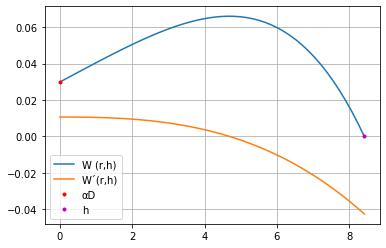

In [ ]:


h=np.random.random()*10
print(h)
# X_=np.sort(np.random.random(size=(50))*h)
X_=np.linspace(0,h)
Y_=W(X_,h)

x=sp.symbols('x')
Y=sp.diff(W(x,h))

Yx = sp.lambdify(x,Y,'numpy')

plt.plot(X_,Y_,label="W (r,h)")
plt.plot(X_,Yx(X_),label="W´(r,h)")
plt.plot(αD,'r.', label='αD')
plt.plot(h,0,'m.', label='h',)

plt.legend()
plt.grid()
plt.show()

Derivada simbolica:  [ 0.01064517  0.01064037  0.01062454  0.01059549  0.01055106  0.01048908
  0.01040738  0.01030378  0.01017611  0.0100222   0.00983987  0.00962697
  0.00938131  0.00910072  0.00878304  0.00842609  0.00802769  0.00758568
  0.00709789  0.00656215  0.00597627  0.0053381   0.00464546  0.00389617
  0.00308807  0.00221899  0.00128675  0.00028918 -0.00077589 -0.00191063
 -0.00311721 -0.00439781 -0.00575459 -0.00718973 -0.0087054  -0.01030378
 -0.01198702 -0.01375731 -0.01561681 -0.01756771 -0.01961216 -0.02175234
 -0.02399042 -0.02632858 -0.02876898 -0.0313138  -0.0339652  -0.03672537
 -0.03959647 -0.04258067]

Derivada numerica:  [ 0.01075529  0.01075529  0.01075529  0.01075529  0.01040834  0.01040834
  0.01040834  0.0100614   0.01040834  0.00971445  0.00971445  0.0100614
  0.00971445  0.00902056  0.00902056  0.00832667  0.00832667  0.00763278
  0.00693889  0.00693889  0.00589806  0.00485723  0.00485723  0.00416334
  0.00277556  0.00208167  0.00138778  0.         -0.00069

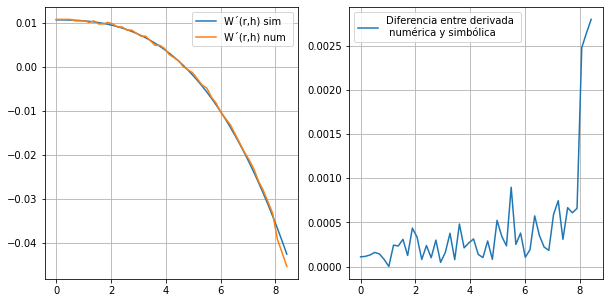

In [ ]:
#Derivada Numerica 
f = interpolate.CubicSpline(X_,Y_)
array_derivate=np.vectorize(misc.derivative)
fp = array_derivate(f,X_,dx=1E-14)


print("Derivada simbolica: ",Yx(X_))
print("\nDerivada numerica: ",fp)

#Gráfico para comparar los datos encontrados con la libreria simbolica con los de la derivada numérica
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.plot(X_,Yx(X_),label="W´(r,h) sim")
plt.plot(X_,fp,label="W´(r,h) num ")
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(X_,abs(Yx(X_)-fp), label='Diferencia entre derivada \n numérica y simbólica')
plt.legend()
plt.grid()

plt.show()




# 2.0 Integración

1. Escribir en código Markdown la deducción para calcular una integral con la regla del trapecio. Ver libro guia.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular con los metodos 1,2,3 las siguientes integrales

- 
 $$
 \int_0^1 e^{1-x^2}\, dx
 $$


- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$


- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

5. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity


6 Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

6.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form 
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

6.3. Make a log-log plot of relative errore versus. You should observe that 
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the number of decimal places of presicion in your calculation.
6.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large

-------------------------------
##***1. Escribir en código Markdown la deducción para calcular una integral con la regla del trapecio. Ver libro guia.***

Para derivar la regla trapezoidal (o regla del trapecio) para aproximar $\int_a^b f(x)\, dx$, sean $x_0=a, x_1=b, h=b-a$ y utilice el polinomio de Lagrange

$$
P_1(x)= \frac{(x-x_1)}{(x_0-x_1)}f(x_0) + \frac{(x-x_0)}{(x_1-x_0)}f(x_1)
$$

Entonces

$$ 
\int_a^b f(x) \, dx = \int_{x_0}^{x_1} \left[{\frac{(x-x_1)}{(x_0-x_1)}f(x_0) + \frac{(x-x_0)}{(x_1-x_0)}f(x_1)}\right] \, dx +\frac{1}{2}\int_{x_0}^{x_1} f''(\xi(x))(x-x_0)(x-x_1)\, dx
$$
(4.23)

El producto $(x-x_0)(x-x_1)$ no ambia de signo en $[x_0, x_1]$, por lo que el teorema del valor promedio ponderado para integrales 1.13 se puede aplicar al término de error para obtener, para algunos $\xi$ en $(x_0, x_1)$


$$
\begin{split}
\int_{x_0}^{x_1} f''(\xi(x))(x-x_0)(x-x_1)\, dx&={ f''(\xi) \int_{x_0}^{x_1}(x-x_0)(x-x_1) \, dx} \\ &= f''(\xi) \left[{\frac{x^3}{3}-\frac{(x_1+x_0)}{2}x^2 + x_0x_1x}\right]_{x_0}^{x_1} \\ &= -\frac{h^3}{6} f''(\xi)
\end{split}
$$

Por consiguiente, la ecuación (4.23) implica que

$$
\begin {split}
\int_a^b f(x)\, dx & = \left[{\frac{(x-x_1)}{(x_0-x_1)}f(x_0) + \frac{(x-x_0)}{(x_1-x_0)}f(x_1)}\right]_{x_0}^{x_1} - \frac {h^3}{12}f''(\xi)\\ & = \frac{(x_1-x_0)}{2}[f(x_0)+f(x_1)] -  \frac {h^3}{12}f''(\xi)
\end {split}
$$

Por medio de la notación $h=x_1-x_0$ obtenemos la siguiente regla:

##***Regla trapezoidal***

$$
\int_a^b f(x) \, dx = \frac{h}{2} [f(x_0)+ f(x_1)] - \frac{h^3}{12}f''(\xi)
$$

----------------------------------------
##***2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson***

La regla de simpson resulta de la integración sobre $[a, b]$ del segundo polinomio de Lagrange con nodos igualmente espaciados $x_0=a, x_2=b$ y $x_1=a+h$, en donde  $h = (b-a)/2$.

$$
\int_a^b f(x) \, dx = \int_{x_0}^{x_2}\left[\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1)+\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2)\right] \, dx +  \int_{x_0}^{x_2} \frac{(x-x_0)(x-x_1)(x-x_2)}{6} f^{(3)} (\xi(x)) \,dx
$$

Al deducir la regla de simpson de esta forma, sin embargo, da un solo término de error $O(h^4)$ relacionado con $f^{(3)}$. Al aproximar el problema de otra forma, se puede derivar otro término de orden superior relacionado con $f^{(4)}$. \\
Para ilustrar este método alternativo, suponga que $f$ se expande en el tercer polinomio de Taylor alrededor de $x_1$. Entonces, para cada $x$ en $[x_0, x_2]$, existe un número $\xi (x)$ en $(x_0, x_2)$ con 

$$
f(x) = f(x_1) + f'(x_1)(x-x_1) + \frac{f''(x_1)}{2}(x-x_1)^2 + \frac{f'''(x_1)}{6}(x-x_1)^3 + \frac{f^{(4)}(\xi(x))}{24}(x-x_1)^4
$$

y 

$$
\int_{x_0}^{x_2} f(x) \, dx = \left[f(x_1)(x-x_1) + \frac{f'(x_1)}{2}(x-x_1)^2 + \frac{f''(x_1)}{6}(x-x_1)^3 + \frac{f'''(x_1)}{24}(x-x_1)^4 \right]_{x_0}^{x_2} + \frac{1}{24}\int_{x_0}^{x_2} f^{(4)}(\xi(x))(x-x_1)^4 \, dx
$$

(4.24)

Puesto que $(x-x_1)^4$ nunca es negativo en $[x_0,x_2]$, el teorema de valor promedio ponderado para las integrales implica que

$$
\frac{1}{24}\int_{x_0}^{x_2} f^{(4)}(\xi(x))(x-x_1)^4 \, dx =\frac{f^{4}(\xi_1)}{24} \int_{x_0}^{x_2} (x-x_1)^4 \, dx =\left[ \frac{f^{4}(\xi_1)}{120} (x-x_1)^5 \right]_{x_0}^{x_2}
$$

Para algún número $\xi_1$ en $(x_0,x_2)$.
Sin embargo, $h=x_2-x_1=x_1-x_0$, por lo que

$$
(x_2-x_1)^2-(x_0-x_1)^2=(x_2-x_1)^4-(x_0-x_1)^4=0
$$

mientras

$$
(x_2-x_1)^3-(x_0-x_1)^3=2h^3
$$
y
$$
(x_2-x_1)^5-(x_0-x_1)^5=2h^5
$$

Por consiguiente, la ecuación (4.24) se puede reescribir como

$$
\int_{x_0}^{x_2} f(x) \, dx = 2hf(x_1)+ \frac{h^3}{3}f''(x_1)+ \frac{f^{(4)}(\xi_1)}{60}h^5
$$

Ahora, si reemplazamos $f''(x_1)$ por medio de la aproximación determinada en la ecuación (4.9) de la sección 4.1, tenemos

$$
\int_{x_0}^{x_2} f(x) \, dx = 2hf(x_1)+\frac{h^3}{3}\left\lbrace \frac{1}{h^2}[f(x_0)-2f(x_1)+f(x_2)]- \frac{h^2}{12}f^{(4)}(\xi_2) \right\rbrace + \frac{f^{(4)}(\xi_1)}{60}h^5 
$$

$$
=\frac{h}{3}[f(x_0)+4f(x_1)+f(x_2)]-\frac{h^5}{12}\left[\frac{1}{3} f^{(4)}(\xi_2)-\frac{1}{5}f^{(4)}(\xi_1)\right]
$$

Con métodos alternos se puede mostrar que los valores $\xi_1$ y $\xi_2$ en esta expresión se pueden reemplazar mediante un valor común $\xi$ en $(x_0, x_2)$. Esto da la regla de simpson.

##***Regla de Simpson:***

$$
\int_{x_0}^{x_2} f(x) \, dx = \frac{h}{3}[f(x_0)+4f(x_1)+f(x_2)]-\frac{h^5}{90}f^{(4)}(\xi)
$$

El término de error en la regla de Simpson implica la cuarta derivada de $f$, por lo que da resultados exactos cuando se aplica a cualquier polinomio de grado tres o menos.


-------------------------------------
##***3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.***

A menudo surge la necesidad de evaluar la integral definida de una función que no tiene una antiderivada o cuya antiderivada no e fácil de obtener. El método básico asociado con la aproximación de $\int_a^b f(x) \, dx$ recibe el nombre de ***cuadratura numérica***. Éste utiliza una suma $\sum_{i=0}^n a_if(x_i)$ para aproximar $\int_a^b f(x) \, dx$.

Los métodos de cuadratura en esta sección se basan en los polinomios de interpolación que se han explicado en el capitulo 3. La idea básica es seleccionar un conjunto de nodos distintos {$x_0,...,x_n$} del intervalo $[a, b]$ Entonces integramos el polinomio interpolante de Lagrange

$$
P_n(x)= \sum_{i=0}^n f(x_i)L_i(x)
$$

Y su término de error de truncamiento sobre $[a,b]$ para obtener

$$
\begin{split}
\int_a^b f(x) \, dx&=\int_a^b \sum_{i=0}^n f (x_i)L_i(x) \, dx + \int_a^b \prod_{i=0}^n (x-x_i)\frac{f^{(n+1)}(\xi(x))}{(n+1)!} \, dx \\ &= \sum_{i=0}^n a_i f(x_i)+\frac{1}{(n+1)!} \int_a^b \prod_{i=0}^n (x-x_i)f^{(n+1)}(\xi(x)) \, dx
\end{split}
$$

donde $\xi(x)$ se encuentra en $[a,b]$ para cada $x$ y

$$
a_i = \int_a^b L_i(x) \, dx 
$$

para cada $i=0,1,...,n$

La formula de cuadratura es, por lo tanto
$$
\int_a^b f(x) \ dx \approx \sum_{i=0}^n a_i f(x_i)
$$

con un error dado por

$$
E(f)= \frac{1}{(n+1)!} \int_a^b \prod_{i=0}^n (x-x_i)f^{(n+1)}(\xi(x)) \, dx
$$

###***4. Calcular con los metodos 1,2,3 las siguientes integrales***
garantizando  que el error sea menor a $\varepsilon=1E-5$. 

In [ ]:
from scipy import integrate
from scipy.integrate import quad
from sympy import simplify
from sympy import init_printing

x = sp.symbols("x") #Definicion de x como simbolo.



- 
 $$
 \int_0^1 e^{1-x^2}\, dx
 $$


##Método del trapecio

$$
|E_N(f)| \leq \frac{(b-a)h^2}{12}f''(\xi)
$$
$$
\frac{(1-0)h^2}{12}f''(\xi) < \epsilon
$$
$$
h<\sqrt{\frac{12}{f''(\xi)}\epsilon}
$$

In [ ]:
f1=lambda x: np.e**(1-x**2)

f1_2 = sp.diff(f1(x), x, 2)
F1_2 = sp.lambdify(x, -f1_2, 'numpy')


max1 = -optimize.fmin_powell( F1_2, 0.1,  ftol=1E-7 , full_output=True)[1]

h1= np.sqrt(12/(max1)*(10**-5))

Optimization terminated successfully.
         Current function value: -2.426123
         Iterations: 2
         Function evaluations: 34


$$
h<\sqrt{\frac{12}{2.426...}\epsilon}
$$

In [ ]:
N1=int(1/h1)

X1=np.linspace(0,1,N1+1)

print('Método del trapecio:', integrate.trapz(f1(X1), X1, h1))

Método del trapecio: 2.030070203709265


##Método de Simpson

$$
N^4\leq\frac{(b-a)^5}{90\cdot2^5\epsilon}f^{(4)}(\xi)
$$

In [ ]:
f1_4 = sp.diff(f1(x), x, 4)
F1_4 = sp.lambdify(x, -f1_4, 'numpy')


max1_ = -optimize.fmin_powell( F1_4, 0.1,  ftol=1E-7 , full_output=True)[1]

epsilon=1e-5

def N(a, b, M):
  return ((b-a)**5*M/(epsilon*180*2**4))**(0.25)

print('N=',N(0,1,max1_),', aproximadamente 6')



Optimization terminated successfully.
         Current function value: -32.619382
         Iterations: 2
         Function evaluations: 44
N= 5.801239696025048 , aproximadamente 6


$$
N = \sqrt[4]{\frac{32.619...}{11250}}\approx6
$$


In [ ]:
print('Método de simpson:', integrate.simps( f1(X1), X1, 6))

Método de simpson: 2.0300784693333593


##Método de cuadratura

La función de scipy para este método incluye el parámetro para ajustar el error absoluto 

In [ ]:
print('Método de cuadratura:', integrate.quad( f1, 0, 1,epsabs=1E-5)[0])

Método de cuadratura: 2.030078469278705


-----------------------------

- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$



In [ ]:
from sympy import simplify
from sympy import integrate

y = sp.symbols("y")

def k(x,y): 
  return 2*y*sp.sin(x)+sp.cos(x)**2

I1 = integrate(k(x,y),(x,sp.sin(x),sp.cos(x)))

simplify(integrate(I1,(y,0,np.pi/4)))

 ### Prueba de integración con sympy
#f = lambda x: 1/(1+x**2)
#I3 = integrate(f(x),(x,-np.inf,np.inf))
#print(I3)                                 Es bastante precisa 

----------------------------------
- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


Por el metodo del trapecio tenemos que: 

$$ \frac{(b-a)h^2}{12} f´´(\epsilon) ≤ \epsilon$$

luego, despejando h 

$$ h = \sqrt{\frac{12 \epsilon }{(b-a)f´´(\epsilon)}}$$

como b = $\infty$ y a = $-\infty$

b - a = $\infty - (-\infty) = \infty + \infty = 2\infty = \infty$


luego $ h = \sqrt{\frac{12\epsilon}{\infty}} = 0 $ .

Sabemos que la formula por el método del trapecio es: 

$$
  \int_{a}^{b} f(x)\,dx 
  = \sum_{i=0}^{N-1}  \int_{i}^{x_{i+1}} f(x)\,dx
  =  \frac{h}{2} \sum_{i=0}^{N-1}(f(x_i)+f(x_{i+1})) 
    - \frac{(b-a) h^2}{12}f''(\xi),
  $$

pero como h = 0 

$$ \int_{a}^{b} f(x)\,dx  =  0$$

Resolviendo esta integral a mano podemos ver que esto es diferente de cero, por 
lo tanto el metodo del trapecio no funciona en esta ocasión.

De manera similar para el método de simpson, se puede llegar a la misma conclusión.

In [ ]:
f = lambda x: 1/(1+x**2)
b = np.inf
a = -np.inf


#metodo del trapecio
h1 = 0
x1= np.linspace( np.NINF,  np.inf, h1)
print('Método del trapecio:', integrate.trapz( f(x1) , x1,h1) )

#Metodo de simpson
x2=np.linspace( -np.inf,  np.inf)
print('Método de simpson:', integrate.simps( f(x2), x2) )

#Metodo de cuadratura 
print('Método de cuadratura:', integrate.quad( f, -np.inf, np.inf  )[0])


Método del trapecio: 0.0
Método de simpson: nan
Método de cuadratura: 3.141592653589793


/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:144: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:154: RuntimeWarning: invalid value encountered in add
  y += start


--------------------------
- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$

$$
|E_N(f)| \leq \frac{(b-a)h^2}{12}f''(\xi)
$$
$$
\frac{(1-0)h^2}{12}f''(\xi) < \epsilon
$$
$$
h<\sqrt{\frac{12}{f''(\xi)}\epsilon}
$$

In [ ]:
f4=lambda x: 1 / sp.log( x ) 


f4_2 = sp.diff(f4(x), x, 2)
F4_2 = sp.lambdify(x, -f4_2, 'numpy')


max4 = -optimize.fmin_powell( F4_2, 0.1,  ftol=1E-7 , full_output=True)[1]

h4= np.sqrt(12/(max4)*(10**-5))

Optimization terminated successfully.
         Current function value: -182687704666362905340279811392876225351494139904.000000
         Iterations: 6
         Function evaluations: 264


<string>:2: RuntimeWarning: invalid value encountered in log


##Observación importante
Como podemos observar, la segunda derivada de la función $\frac{1}{\ln{x}}$ tiene sus máximos valores en divergencias al infinito ubicadas en $x=0$ y $x=1$, siendo así, es imposible garantizar una precisión mínima para el método del trapecio, pues el espaciado entre intervalos sería $0$, y la cantidad de estos sería infinita. Similarmente ocurre con el método de Simpson

In [ ]:
h4

In [ ]:
f4=lambda x: 1 / np.log( x ) 

X_4=np.linspace( np.e, 2 * np.e )
print('Resultados por precisión predeterminada de las funciones de scipy')
print('Método del trapecio:', integrate.trapz( f4(X_4) , X_4) )

print('Método de simpson:', integrate.simps( f4(X_4), X_4) )

Resultados por precisión predeterminada de las funciones de scipy
Método del trapecio: 2.0038884430101813
Método de simpson: 2.0038135372994286


In [ ]:
print('Método de cuadratura (con epsilon=0.00001):', integrate.quad( f4, np.e, 2 * np.e, epsabs=1E-5  )[0])

Método de cuadratura (con epsilon=0.00001): 2.0038105616240243


###***5. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all resistance except gravity is neglected, the escape velocity v is given by***

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity

In [ ]:
from scipy import integrate
from sympy import simplify
from sympy import init_printing

R=6371000
integrando= lambda x: x**-2

integ=integrate.quad(integrando,1,np.inf)
print((2*9.8*R*integ[0])**0.5)

11174.596189572132


###***6 Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:***

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

In [ ]:
t = sp.symbols("t")

N = lambda t: np.e**(-t)
E = 1E-6

# como a = 0, b-a = b
b = 2     #Valor hasta el cual se calcula la integral

#Metodo del trapecio
N_p2 = sp.diff(N(t),t,2)
No_p2 = sp.lambdify(t,-N_p2,'numpy')

min1=optimize.minimize(No_p2,x0=4,bounds=((0,1 ), ) )
max = np.abs(min1['fun'][0])

h1 = np.sqrt(12*E/(max)*b) 

N1=int(b/h1)
x1= np.linspace(0,b,N1+1)

print('Método del trapecio:', integrate.trapz( N(x1) , x1, h1) )

#Metodo de simpson 

  #h = (b-a)/(2N)
  #N**4 = (b-a)**5 * Max(f'4(E))/(180*(2)**4*E)

N_p4 = sp.diff(N(t),t,4)
No_p4 = sp.lambdify(t,-N_p4,'numpy')

min2 = optimize.minimize(No_p4,4,bounds=((0,1),))
max2 = np.abs(min2['fun'][0])

N2 = int(((b**5 * max2)/(180 * 2**4 * E))**(1/4))
h2 = b/(2*N2)
x2 = np.linspace(0,b,N2+1)

print('Método de simpson', integrate.simps( N(x2) , x2, h2) )


#Metodo de cuadratura 
print('Método de cuadratura:', integrate.quad( N, 0, b)[0])

#Exacto
exact = 1-np.e**(-b)
print("El valor exacto sería: ",exact)

Método del trapecio: 0.8646664481975522
Método de simpson 0.8646723662255082
Método de cuadratura: 0.8646647167633872
El valor exacto sería:  0.8646647167633873


###***6.2. Compute the relative error*** $\epsilon=|numerical-exact|/exact$ 
###***in each case. Present your data in the tabular form with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160***

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

In [ ]:
import pandas as pd


t = sp.symbols("t")
N = lambda t: np.e**(-t)
vals = (2,10,20,40,80,160)

NumϵT = np.zeros(6)
NumϵS = np.zeros(6)
NumϵG = np.zeros(6)

exact = lambda t: 1-np.e**(-t)

for i in range(len(vals)):
  x1= np.linspace(0,1,vals[i])
  h=1/vals[i]

  NumεT[i]=integrate.trapz( N(x1) , x1, h)

  NumϵS[i]=integrate.simps( N(x1) , x1, h)

  NumϵG[i]=integrate.quad( N, 0, 1)[0]

NumE= exact(1)

In [ ]:
ϵT = np.abs(NumϵT - NumE) / NumE
ϵS = np.abs(NumϵS - NumE) / NumE
ϵG = np.abs(NumϵG - NumE) / NumE

#Cuadro
df = pd.DataFrame()
df['N'] = vals
df['ϵT'] = ϵT 
df['ϵS'] = ϵS 
df['ϵG'] = ϵG 

df

,N,ϵT,ϵS,ϵG
0,2,0.081977,8.197671e-02,1.756347e-16
1,10,0.001029,1.214802e-04,1.756347e-16
2,20,0.000231,1.303125e-05,1.756347e-16
3,40,0.000055,1.513477e-06,1.756347e-16
4,80,0.000013,1.824856e-07,1.756347e-16
5,160,0.000003,2.240700e-08,1.756347e-16



6.3. Make a log-log plot of relative errore versus. You should observe that 
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the number of decimal places of presicion in your calculation.



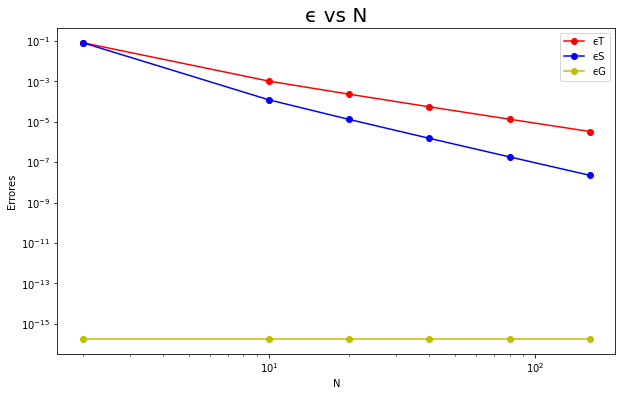

In [ ]:
plt.figure(figsize=(10,6))

plt.title("ϵ vs N", fontsize=20)
plt.loglog(df['N'],df['ϵT'],'ro-',label = "ϵT")
plt.loglog(df['N'],df['ϵS'],'bo-',label = "ϵS")
plt.loglog(df['N'],df['ϵG'],'yo-',label = "ϵG")

plt.xlabel("N")
plt.ylabel("Errores")
plt.legend()
plt.show()

6.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large

In [ ]:
df['log10(ϵT)']=np.log10(df['ϵT'])
df['log10(ϵS)']=np.log10(df['ϵS'])
df['log10(N)']=np.log10(df['N'])


#α=log(ϵ)/log(N)
df['αT']=df['log10(ϵT)']/df['log10(N)']
df['αS']=df['log10(ϵS)']/df['log10(N)']
df

,N,ϵT,ϵS,ϵG,log10(ϵT),log10(ϵS),log10(N),αT,αS
0,2,0.081977,8.197671e-02,1.756347e-16,-1.086310,-1.086310,0.30103,-3.608642,-3.608642
1,10,0.001029,1.214802e-04,1.756347e-16,-2.987756,-3.915494,1.00000,-2.987756,-3.915494
2,20,0.000231,1.303125e-05,1.756347e-16,-3.636708,-4.885014,1.30103,-2.795253,-3.754728
3,40,0.000055,1.513477e-06,1.756347e-16,-4.261315,-5.820024,1.60206,-2.659897,-3.632838
4,80,0.000013,1.824856e-07,1.756347e-16,-4.874437,-6.738771,1.90309,-2.561327,-3.540963
5,160,0.000003,2.240700e-08,1.756347e-16,-5.481976,-7.649616,2.20412,-2.487149,-3.470599


El valor de alpha para el método de simpson ronda el $3.6$ y para el método del trapecio está por $2.6$

Para el método de cuadratura el error relativo es el $0$ computacional